In [ ]:
HELLO THIS IS YOUR DOCTOR GEORGE GIVE ME A CALL LATER  TODAY
uqaav pulx lx evik fvwpvk oqvkoq olnq rq s wsaa aspqk  pvfse
jvjah hnzs xz wqlp shqzfr vlmtxc vbjk de p jync jpmsx  koshw

In [1]:
import numpy as np
import matplotlib.pyplot as plt
ENGLISH_ALPHABET = 'abcdefghijklmnopqrstuvwxyz'

FIRST_LETTER= ord (ENGLISH_ALPHABET[0]) # Get the ASCLE number of the y tristeten w

def to_number(Letter):
    number = ord(Letter) # Convert the Letter into its equivalent ASCII number (97-122)

    return number - FIRST_LETTER # Shift the number to the alphabet range (0 - 25)

def count_letters (message):

    letter_count = [0]*len(ENGLISH_ALPHABET)

    for letter in message: # For every Letter in the message

        if letter in ENGLISH_ALPHABET:  
            position = to_number (letter) 
            letter_count[position] += 1 

    return letter_count

def plot(letter_count, name):



    plt.style.use('seaborn-muted') 

    alphabet= list (ENGLISH_ALPHABET)

    plt.plot(alphabet, letter_count, label=name)

    
def show(legend=True):



    if legend:

        plt.legend()

    plt.show()

Enter the plain text:
HELLO THIS IS YOUR DOCTOR GEORGE GIVE ME A CALL LATER  TODAY
Enter the alpha numeric scrambling:
uqaav pulx lx evik fvwpvk oqvkoq olnq rq s wsaa aspqk  pvfse
Enter the vigenere cipher text:
jvjah hnzs xz wqlp shqzfr vlmtxc vbjk de p jync jpmsx  koshw
[4, 0, 2, 2, 6, 0, 3, 2, 3, 0, 0, 5, 1, 0, 6, 0, 0, 4, 2, 4, 1, 1, 0, 0, 2, 0]
[5, 0, 0, 0, 2, 2, 0, 0, 1, 0, 4, 3, 0, 1, 3, 4, 6, 1, 4, 0, 2, 6, 2, 2, 0, 0]
[1, 1, 2, 1, 1, 1, 0, 4, 0, 5, 2, 2, 2, 2, 1, 3, 2, 1, 4, 1, 0, 3, 2, 3, 1, 3]


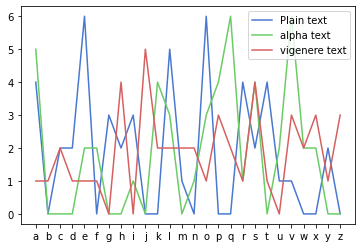

In [2]:
plain_message =input("Enter the plain text:\n")
alpha_message =input("Enter the alpha numeric scrambling:\n")
vigenere_message =input("Enter the vigenere cipher text:\n")
plain_letter_count= count_letters (plain_message.lower()) 
alpha_letter_count= count_letters (alpha_message.lower())
vigenere_letter_count= count_letters (vigenere_message.lower())
print(plain_letter_count)
print(alpha_letter_count)
print(vigenere_letter_count)
plot(plain_letter_count, 'Plain text') 

plot(alpha_letter_count, 'alpha text') 

plot(vigenere_letter_count, 'vigenere text') 
show()

In [20]:
import matplotlib.pyplot as plt
import numpy as np


THEORETICAL_FREQUENCIES = [12.7, 9.06, 8.17, 7.51, 6.97, 6.75, 6.33, 6.09, 5.99, 4.25, 4.02, 2.78, 2.76,
                           2.41, 2.36, 2.23, 2.01, 1.97, 1.93, 1.49, 0.99, 0.77, 0.15, 0.15, 0.09, 0.07]

ALPHABET_SORTED_BY_FREQUENCY = ['e', 't', 'a', 'o', 'i', 'n', 's', 'h', 'r', 'd', 'l', 'c', 'u',
                                'm', 'w', 'f', 'g', 'y', 'p', 'b', 'v', 'k', 'j', 'x', 'q', 'z']


def theoretical():
    """ Shows theoretical letter count plotted as a pie chart and a bar chart sorted by frequency. """
    plt.style.use('seaborn-muted')  # Set display style
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Get cycle of colors
    plt.title('Theoretical letter frequency for the English alphabet')  # Set plot title

    plt.bar(ALPHABET_SORTED_BY_FREQUENCY, THEORETICAL_FREQUENCIES, color=colors)  # Show bar chart

    # For the pie chart to be nicer, last 8 frequencies displayed together
    alphabet_pie = ALPHABET_SORTED_BY_FREQUENCY[:-7]  # Remove the last 8 letters for the pie chart
    alphabet_pie.append('y - z')  # Put the last 8 as a single part of the pie
    frequencies_pie = THEORETICAL_FREQUENCIES[:-7]  # # Remove the last 8 frequencies
    frequencies_pie.append(3.71)  # Add the las 8 frequencies together
    ax = plt.axes([.35, .27, .6, .6])  # Draw the pie chart inside the bar chart
    ax.pie(frequencies_pie, labels=alphabet_pie, autopct='%.1f', pctdistance=0.8)  # Show pie chart

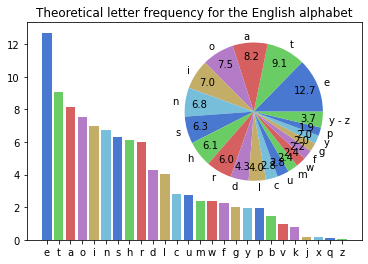

In [22]:
theoretical()
show(legend=False)

In [23]:
def sort(numbers, letters, by_number=True, reverse=False):
    """ Given two lists, sorts them together.
        If by_number is True sorts them by number if False by letter.
        If reverse is True sorts them in descending order. """
    # Put them together, first the one which sets the order
    together = zip(numbers, letters) if by_number else zip(letters, numbers)
    together = sorted(together, reverse=reverse)  # Sort them together
    # Get back the lists, now sorted
    if by_number:
        numbers, letters = zip(*together)
    else:
        letters, numbers = zip(*together)

    return numbers, letters

In [24]:
def count_to_frequency(count):
    """ Given a letter count gets the frequency as a percentage of the total number of letters. """
    total = 0
    for letter_count in count:  # Sum all letter counts to get the total number of letters
        total += letter_count

    frequencies = []
    for letter_count in count:  # For every letter count
        # Divide by the total number of letter and multiply by 100 to get the frequency percentage
        frequencies.append((letter_count / total) * 100)

    return frequencies

In [25]:
def theoretical_vs_actual(sample_letter_count):
    """ Given  a sample letter count plots side by side with the theoretical letter frequency for comparison. """
    # Sort in alphabetical order
    theoretical_frequencies, alphabet = sort(THEORETICAL_FREQUENCIES, ALPHABET_SORTED_BY_FREQUENCY, by_number=False)
    actual_frequencies = count_to_frequency(sample_letter_count)  # Get letter frequency from letter count
    # Plot
    plt.title('Letter frequency comparison')
    plt.plot(alphabet, theoretical_frequencies, linestyle='--', color='gray', label='Theoretical')
    plt.plot(alphabet, actual_frequencies, color='darkgray', label='Actual')
    # Fill
    plt.fill_between(alphabet, theoretical_frequencies, actual_frequencies,  # Fill green bellow the actual frequencies
                     where=np.array(theoretical_frequencies) <= np.array(actual_frequencies),
                     interpolate=True, color='green', alpha=0.3)
    plt.fill_between(alphabet, theoretical_frequencies, actual_frequencies,  # Fill red above the actual frequencies
                     where=np.array(theoretical_frequencies) > np.array(actual_frequencies),
                     interpolate=True, color='red', alpha=0.3)


Enter the plain text:
HELLO THIS IS YOUR DOCTOR GEORGE GIVE ME A CALL LATER  TODAY


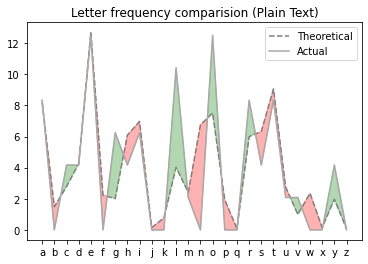

In [29]:
plain_message =input("Enter the plain text:\n")
plain_letter_count= count_letters (plain_message.lower()) 
theoretical_vs_actual(plain_letter_count)
plt.title("Letter frequency comparision (Plain Text)")
show()

Enter the alpha numeric scrambling:
uqaav pulx lx evik fvwpvk oqvkoq olnq rq s wsaa aspqk  pvfse


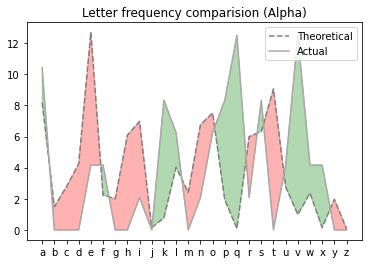

In [30]:
alpha_message =input("Enter the alpha numeric scrambling:\n")
alpha_letter_count= count_letters (alpha_message.lower())
theoretical_vs_actual(alpha_letter_count)
plt.title("Letter frequency comparision (Alpha)")
show()

Enter the vigenere cipher text:
jvjah hnzs xz wqlp shqzfr vlmtxc vbjk de p jync jpmsx  koshw


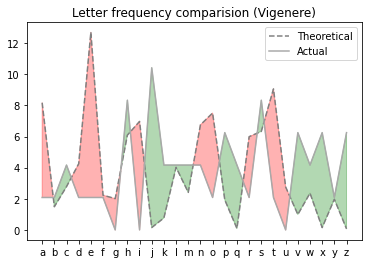

In [28]:
vigenere_message =input("Enter the vigenere cipher text:\n")
vigenere_letter_count= count_letters (vigenere_message.lower())
theoretical_vs_actual(vigenere_letter_count)
plt.title("Letter frequency comparision (Vigenere)")
show()